In [51]:
# -*- coding: utf-8 -*-
%pylab inline

import numpy
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn
import scipy

#call in data set
df = pd.read_csv('gapminder.csv')
print(df.columns)

Populating the interactive namespace from numpy and matplotlib
Index(['country', 'incomeperperson', 'alcconsumption', 'armedforcesrate',
       'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate',
       'internetuserate', 'lifeexpectancy', 'oilperperson', 'polityscore',
       'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate'],
      dtype='object')


/Users/barantoppare/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/barantoppare/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/barantoppare/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

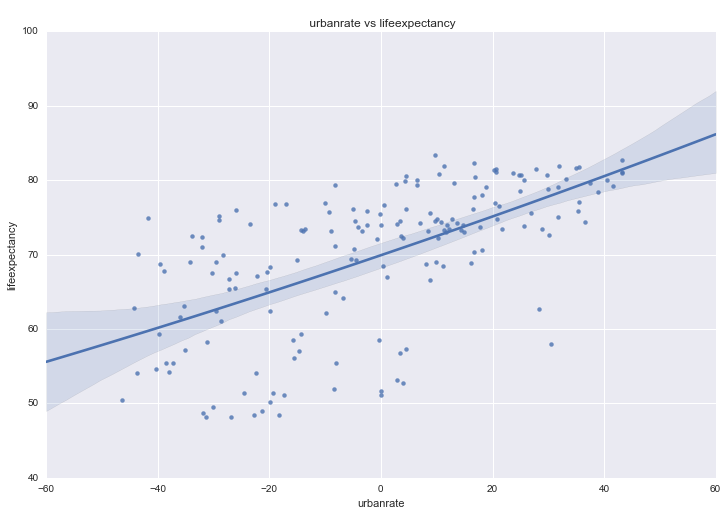

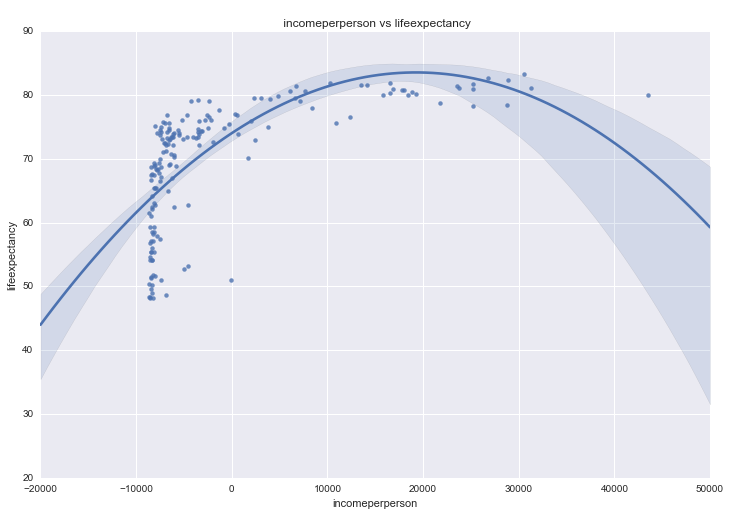

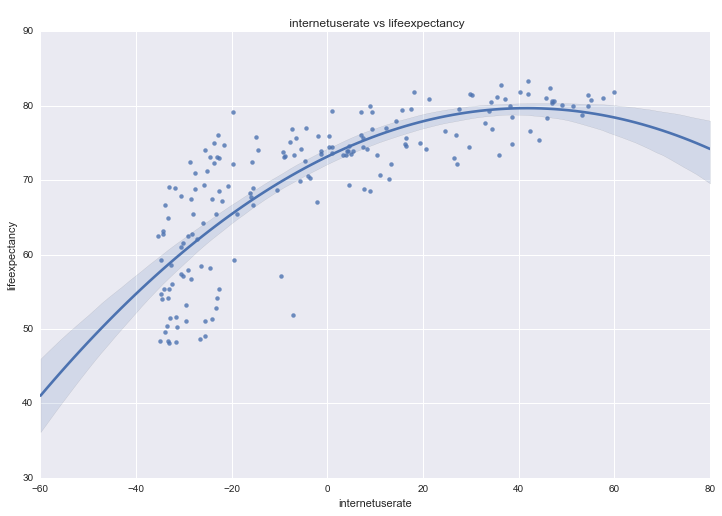

In [72]:
xs = ['urbanrate', 'incomeperperson', 'internetuserate']
#xs = list(df.columns)[1:]
y = 'lifeexpectancy'
if y in xs:
    xs.remove(y)

data = df[xs+[y]]
data[y] = pd.to_numeric(data[y], errors='coerce')
for x in xs:
    data[x] = pd.to_numeric(data[x], errors='coerce')
    data[x] = data[x] - data[x].mean()
    
data = data.dropna()

for x in xs:
    scat1 = seaborn.regplot(x=x, y=y, scatter=True, order=2, data=data)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title ('\n %s vs %s' %(x, y))
    plt.show()


In [84]:
reg1 = smf.ols('lifeexpectancy ~ urbanrate+internetuserate +I(internetuserate**2)', data=data).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:         lifeexpectancy   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     107.6
Date:                Sun, 21 Feb 2016   Prob (F-statistic):           5.29e-39
Time:                        12:21:44   Log-Likelihood:                -544.71
No. Observations:                 173   AIC:                             1097.
Df Residuals:                     169   BIC:                             1110.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                 

PEARSON CORR BETWEEN internetuserate and incomeperperson is: 0.798369340604


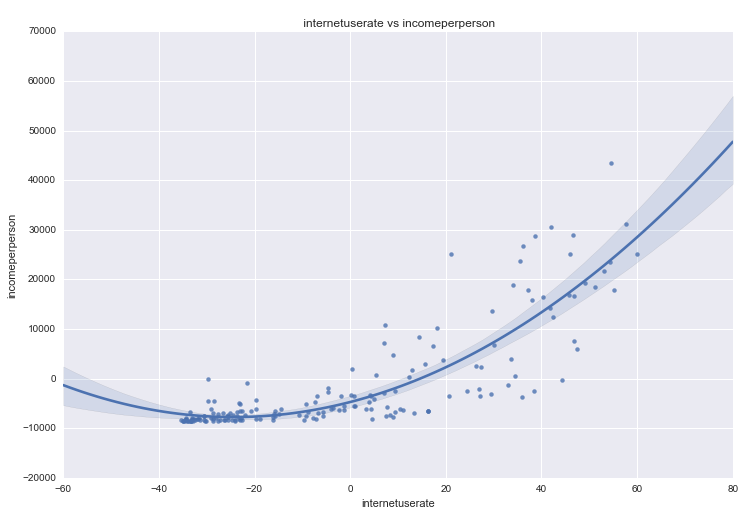

In [87]:
pearson = scipy.stats.pearsonr(data['internetuserate'], data['incomeperperson'])
print ('PEARSON CORR BETWEEN %s and %s is: %s' %(x, y, pearson[0]))


x='internetuserate'
y='incomeperperson'
scat1 = seaborn.regplot(x=x, y=y, scatter=True, order=2, data=data)
plt.xlabel(x)
plt.ylabel(y)
plt.title ('\n %s vs %s' %(x, y))
plt.show()


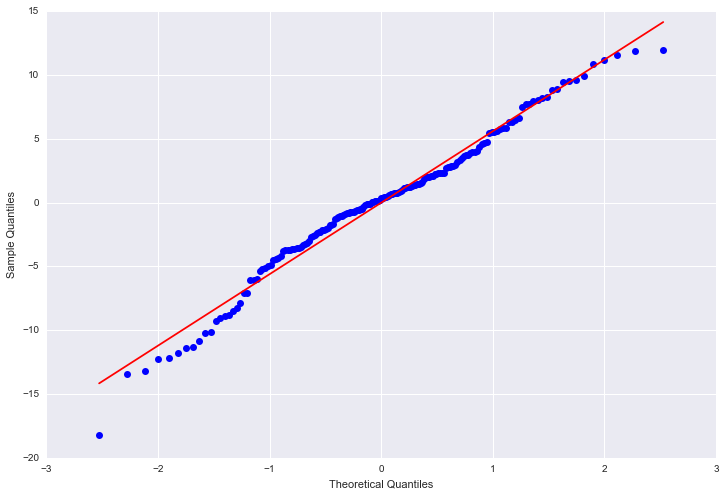

In [78]:
#Q-Q plot for normality
fig1=sm.qqplot(reg1.resid, line='r')

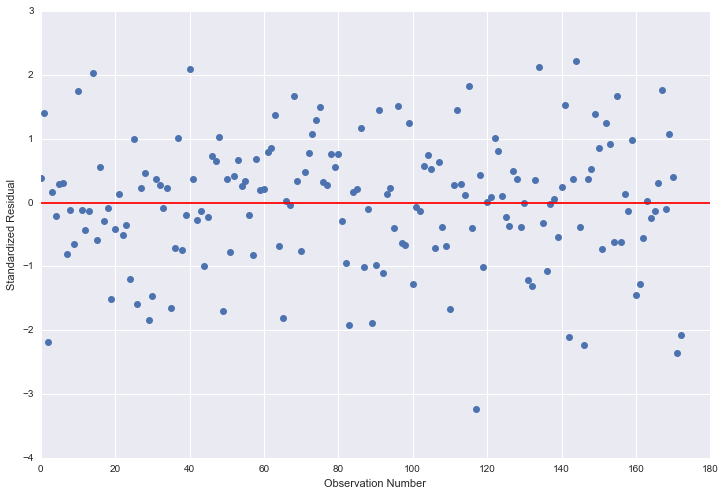

In [89]:
# simple plot of residuals
stdres=pd.DataFrame(reg1.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')

In [105]:
check1 = stdres[(abs(stdres[0]) > 2.5)].size
check2 = stdres[(abs(stdres[0]) > 2)].size

print (check1 / stdres.size)
print (check2 / stdres.size)


0.00578034682081
0.0578034682081


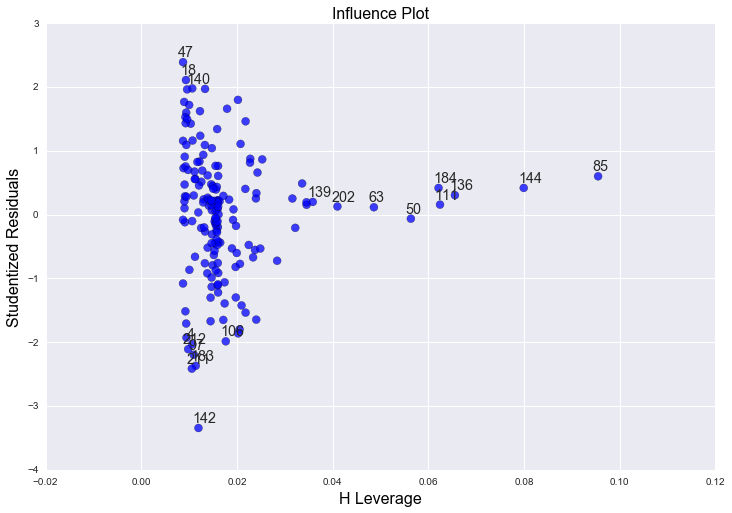

In [71]:
# leverage plot
fig3=sm.graphics.influence_plot(reg5, size=8)